<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Confidence Intervals for Statistical Measurements

_Authors: Kiefer Katovich (SF) and Matt Brems (DC)_

---

### Learning Objectives
- Review statistics, parameters, and methods of making inferences about a population.
- Understand the relationship between the mean, the standard deviation, and the standard error of the mean.
- Calculate the standard error of the mean based on example data.
- Understand the relationship between the CLT and the standard error of the mean.
- Understand the concept of a confidence interval.
- Calculate the confidence interval on age data.
- Interpret the meaning of the confidence interval and understand potential pitfalls of describing Frequentist statistical measures.

### Lesson Guide
- [Review of Sample Statistics and Parameters](#review-statistics-parameters)
- [The Standard Error](#standard-error)
- [The CLT and Uncertainty of the Sample Mean](#clt-uncertainty)
- [Confidence Intervals](#confidence-intervals)
- [Interpreting the Confidence Interval](#interpreting-ci)



In [1]:
# Bring in our libraries, set some variables for the whole notebook
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='review-statistics-parameters'></a>

### Review and Introduction: Statistics Surrounding the Ages of Single People

---

Below is a random sample of data about age taken from a survey conducted by a bank. The data is specifically a subset of people who have classified themselves as "single" as opposed to "married." 

We are interested in describing our sample using **descriptive statistics**. We are also interested in making statements about the overall population that the sample was drawn from (i.e., all single people who would conceivably take the bank survey) using **inferential statistics**.

In [2]:
single = np.array([24, 26, 35, 32, 38, 35, 31, 43, 40, 42, 39, 48, 37, 27, 33, 33, 34,
                   37, 33, 26, 30, 30, 30, 31, 33, 35, 43, 30, 35, 26, 23, 27, 54, 35,
                   29, 28, 37, 33, 34, 32, 29, 43, 29, 36, 36, 34, 39, 33, 30, 32, 23,
                   30, 31, 38, 35, 22, 59, 20, 45, 33, 35, 33, 23, 58, 33, 30, 38, 28,
                   50, 31, 38, 42, 41, 33, 29, 29, 31, 30, 28, 27, 29, 38, 36, 56, 36,
                   31, 30, 29, 25, 41, 47, 34, 38, 50, 23, 28, 35, 32, 36, 28, 39, 33,
                   25, 36, 27, 30, 29, 42, 43, 20, 26, 53, 41, 27, 31, 33, 38, 37, 31,
                   28, 25, 47, 38, 41, 26, 26, 25, 32, 32, 23, 31, 51, 49, 32, 48, 44,
                   30, 31, 34, 37, 31, 32, 24, 38, 38, 39, 29, 25, 29, 31, 24, 35, 28,
                   24, 24, 35, 36, 21, 56, 54, 28, 32, 27, 30, 31, 31, 27, 32, 30, 29,
                   27, 26, 36, 27, 32, 32, 38, 41, 33, 33, 26, 29, 27, 42, 35, 32, 35,
                   43, 32, 22, 32, 37, 30, 39, 28, 33, 25, 34, 39, 31])

Plotting a histogram can provide an effective visual description of the data before we even calculate any statistical measures.

**The following code plots the histogram for the distribution of ages using `matplotlib` and `seaborn`.**

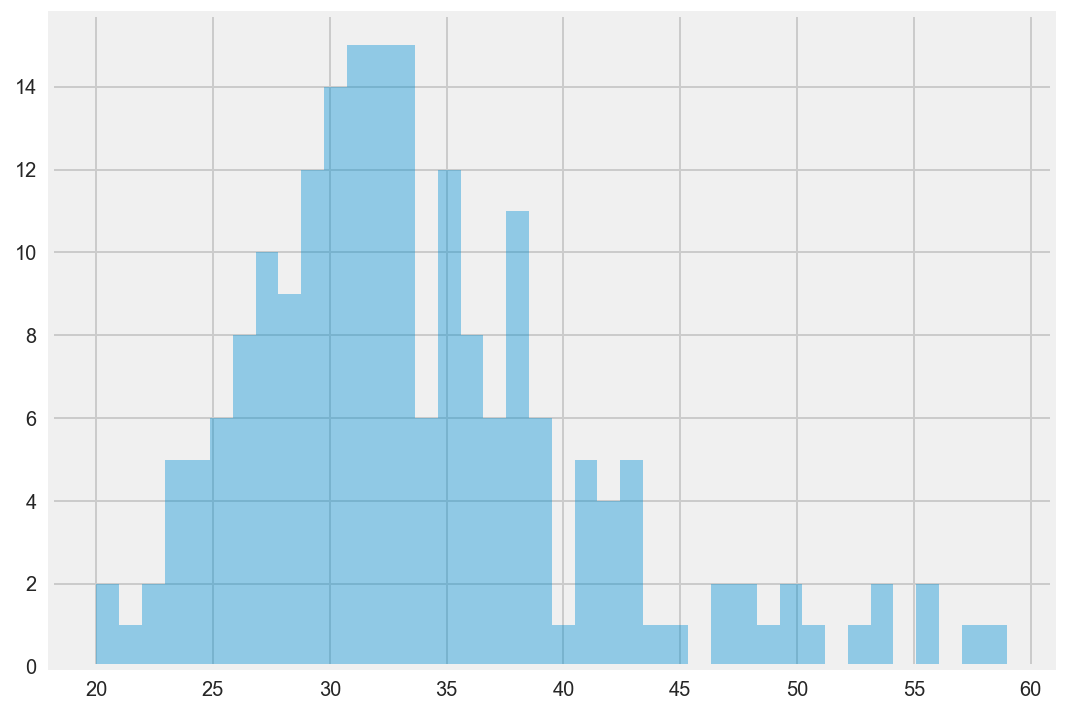

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(single, bins=40, kde=False)

**Calculate the mean and the standard deviation of the data. What do these statistics tell us specifically?**

In [4]:
print np.mean(single)
print np.std(single)

33.555
7.46103042481


_This tells us that the mean of our sample is 33.55 years old._   
_The standard deviation, which is the approximate average distance of any 
observed age from the mean age, is 7.46 years._ 

<a id='standard-error'></a>

### The Standard Error of a Statistic

---

If our goal extends beyond simply describing the data we have, and we instead want to infer something about the overall population based on the information in this sample, we will inherently have some degree of uncertainty.

**Uncertainty About the True Value**

Working within the Frequentist framework, we know that there is a true value for the mean age of all single people. If we had surveyed every single one of these people and calculated the mean, then we would have that value. However, we have only measured 200 people's ages at random. Depending on our sample size, we will have some degree of uncertainty about how far off our statistic of our random sample is from the true parameter. This distance is our measurement "error."

**The Mean vs. The Standard Deviation vs. The Standard Error**

It is important to frame these definitions in the context of *repeated measurements*. Furthermore, as Frequentists, we conceive of this sample as one of many hypothetical random samples from the same overall population. Let's start with our calculated statistic, the mean age.

> **Mean:** Our sample mean age is the estimate of the true mean age of the overall population.

We also calculated the standard deviation of ages in our sample.

> **Standard deviation:** This quantifies the spread of our data — i.e., the average distance of an observation from the mean. If we were to repeat a measurement, it would quantify our certainty about how far that age will be from the mean age.

Lastly, we have the standard error of our mean. Whereas the standard deviation is a measure of the spread of our data, the standard error is a measure of spread in our calculated statistic. In other words, the standard error is the standard deviation of our statistic.

> **Standard error:** If you had a new random sample of ages that was the same size as the original, the standard error would quantify our certainty about how far the new sample mean would be from the original sample mean.

The calculation for the standard error of the sample mean is:

### $$ SE_{\bar{x}} = \frac{s_{x}}{\sqrt{n}} $$

Here, $s_{x}$ is the sample standard deviation and $n$ is the sample size.

**Now, let's manually calculate the standard error of the sample mean for our ages.**

In [7]:
std = np.std(single)
n = len(single)
sem = std/np.sqrt(n)
print 'SEM:', sem

SEM: 0.527574520803


<a id='clt-uncertainty'></a>

### The Central Limit Theorem and Uncertainty of the Sample Mean

---

Recall that the central limit theorem (CLT) dictates that the distribution of sample means (calculated across different random samples from our overall population) will be normally distributed. 

Using the CLT, we are able to state that:

> Our sample mean (33.55) falls somewhere on the normal distribution of all sample means calculated from random samples drawn from the overall population of ages.

We also know from the CLT that the standard deviation of this normal distribution sets parameters to be $\frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the standard deviation of the population. 

Look familiar? Replacing $\sigma$ with our estimate of the standard deviation ($s$), we set parameters for the standard deviation of the distribution using our measure of the standard error of the mean, $\frac{s}{\sqrt{n}}$.

Then, we use our sample mean — our **point estimate** — as the best estimate of the population mean. Set parameters for the distribution of sample means like so:

### $$ \bar{X} \text{ ~ } N(\bar{x}, \frac{s_{x}}{\sqrt{n}} )$$



What this equation is saying is **$\bar{X}$** has a standard normal distribution( $N$ ) with a mean of $\bar{x}$ and standard deviation of $\frac{s_{x}}{\sqrt{n}}$ .

In this equation, **$\bar{X}$** is a random variable from the _sample space_(a.k.a., $\Omega$).  The sample space is the set containing all possible permutations of $\bar{x}$(_our_ sample mean).  Thus we are saying that any and all of our possible sample means will fall within the normal distribution defined above.

**The code below visualizes this distribution with `matplotlib` and `scipy`.**

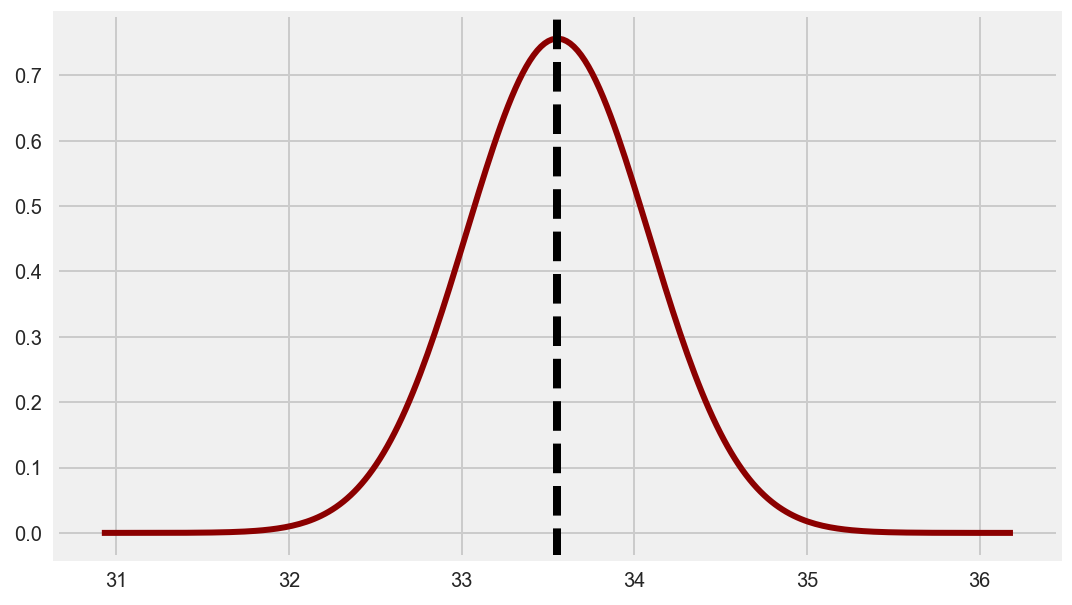

In [5]:
single_mean = np.mean(single)
single_sem = np.std(single)/np.sqrt(len(single))

# Generate points on the x axis:
xpoints = np.linspace(single_mean - single_sem*5, single_mean + single_sem*5, 250)

# Use stats.norm.pdf to get values on the probability density function for the normal distribution:
ypoints = stats.norm.pdf(xpoints, single_mean, single_sem)

# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(8,5))

# Get the current "axis" out of the figure:
ax = fig.gca()

# Plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(single_mean, linewidth=4, ls='dashed', c='black')

**What does this look like for our original distribution?**

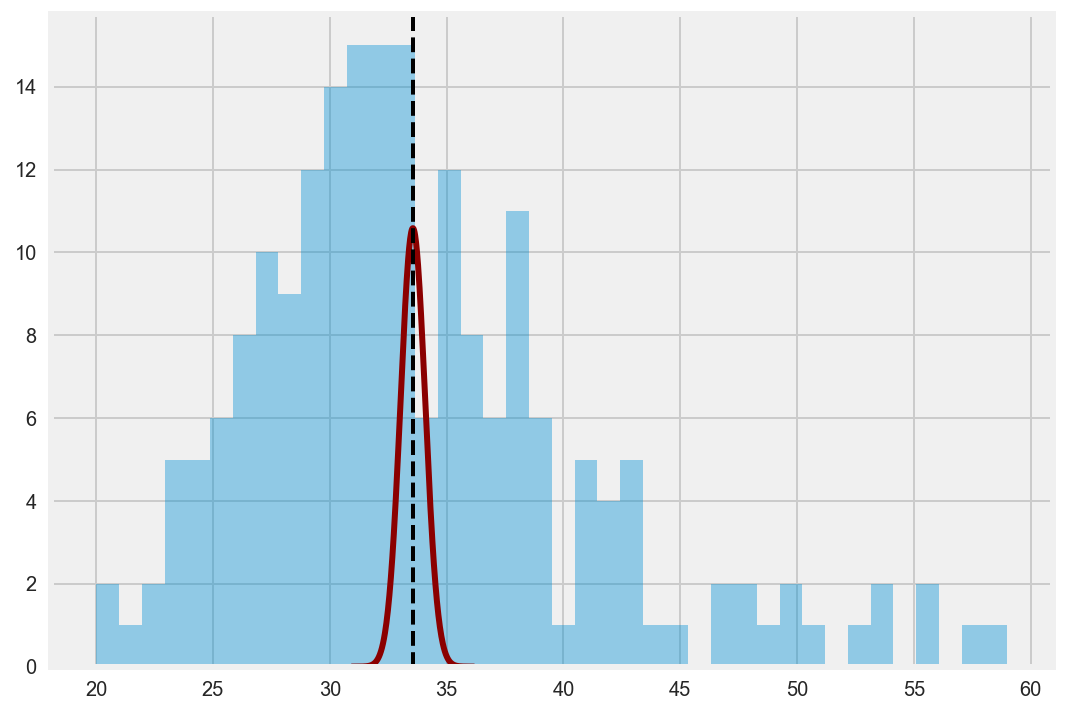

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.distplot(single, bins=40, kde=False)
ax.plot(xpoints, ypoints*14, linewidth=3, color='darkred')
ax.axvline(single_mean, linewidth=2, ls='dashed', c='black')

<a id='confidence-intervals'></a>

### Confidence intervals

---

A confidence interval describes a set of possible values for the parameter based on a statistic. Confidence intervals will be centered at the point estimate and typically include +/- a few standard errors.

Because the mean statistic is normally distributed, according to the CLT, our confidence interval for the sample mean will be:

### $$ \text{CI} = \text{point estimate} \pm \text{multiplier} \cdot \text{standard error} $$

### $$\text{CI} = \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$$

$z_{\alpha/2}$ is the z-score on the unit **Z ~ N(0, 1)** distribution that specifies the *degree* of certainty we want. For now, you can ignore the $\alpha/2$ part; this relates to the concept of Type I error, which we will cover later. What is important now is that, the larger the z-score, the greater the area under the normal distribution of sample means covered by the confidence interval.

**If we want our confidence level — i.e., how confident we are that the true value of the parameter lies within the confidence interval — to be:**
- **90%**: The z-score multiplier should be **z = 1.645**, because 90% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -1.645 and 1.645.
- **95%**: The z-score multiplier should be **z = 1.96**, because 95% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -1.96 and 1.96.
- **99%**: The z-score multiplier should be **z = 2.575**, because 99% of the area under the $Z ~ N(0, 1)$ normal distribution lies between -2.575 and 2.575.



**The plot below shows these z-score bounds on the $Z ~ N(0, 1)$ distribution:**

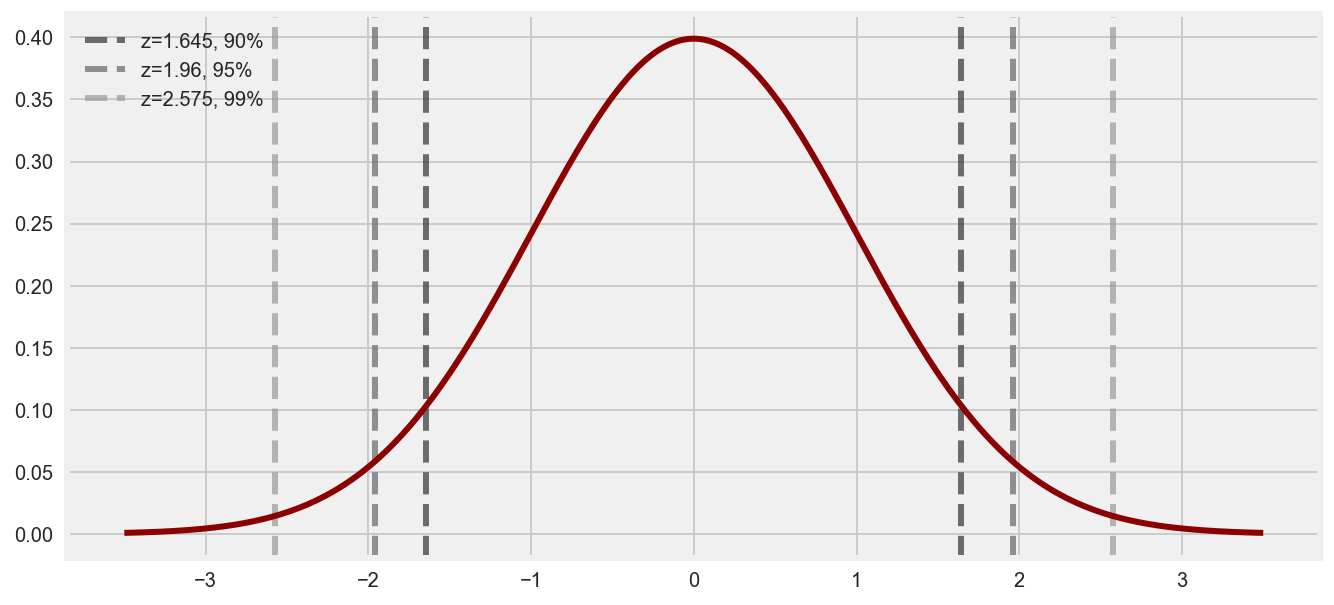

In [7]:
# Initialize a matplotlib "figure:"
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

zx = np.linspace(-3.5, 3.5, 250)

Z = stats.norm(0, 1)
zy = Z.pdf(zx)

# 90%:
ax.axvline(-1.645, ls='dashed', lw=3, color='#333333', alpha=0.7)
ax.axvline(1.645, ls='dashed', lw=3, color='#333333', alpha=0.7, label='z=1.645, 90%')

# 95%:
ax.axvline(-1.96, ls='dashed', lw=3, color='#666666', alpha=0.7)
ax.axvline(1.96, ls='dashed', lw=3, color='#666666', alpha=0.7, label='z=1.96, 95%')

# 99%:
ax.axvline(-2.575, ls='dashed', lw=3, color='#999999', alpha=0.7)
ax.axvline(2.575, ls='dashed', lw=3, color='#999999', alpha=0.7, label='z=2.575, 99%')

ax.plot(zx, zy, linewidth=3, color='darkred')
ax.legend(loc='upper left')

<a id='interpreting-ci'></a>

### Interpreting the Confidence Interval

---

Suppose a 95% confidence interval for the mean number of burritos I eat in a week is [2.5, 5.5]. There are two interpretations we can derive from this, and one of them is wrong.


**Interpretation 1 (incorrect):**
> There is a 95% probability that the number of burritos I eat in a week is between 2.5 and 5.5.

**Interpretation 2 (correct):**
 >If we pulled 100 samples and constructed confidence intervals in the same manner, we expect that 95 of the intervals would contain the true mean of  burritos I eat in a week.




Why is interpretation 1 wrong? It assigns a probability to the true value. In Frequentist statistics, the true value is fixed and the data is random. Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

This is a critical difference in Frequentist statistics (vs. Bayesian): our data has a probability of occuring, but there is no probability regarding possible values for the true parameter.

[This blog post has a great discussion of the difference between the Frequentist confidence interval and the Bayesian credible interval.](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/)

**We can also reframe this statement in terms of the random sampling procedure:**

Typically, you will see confidence intervals expressed as...
> _We are 95% confident that the mean number of burritos I eat each week is between 2.5 and 5.5._

While the above is the common shorthand, we can also think about a supplementary statement...
> _We are also 5% confident that the mean number of burritos I eat each week does not fall in between 2.5 and 5.5. _

**Tip:**  It is the random data and mathmatical process that you are measuring when expressing a confidence interval. 

[This post has more examples and information on the correct way to interpret Confidence Intervals](http://www.mathbootcamps.com/interpreting-confidence-intervals/)